# Data was imputed in three different ways.

## Imputation 1
#### Here all the values were imputed without considering their visit number 
#### Dimension of data after imputation (1734, 7)
#### values like >1700, <200, <80 was replaced by 2000, 100 and 40 resp.

In [85]:
from sklearn import preprocessing
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
import seaborn as sns
from sklearn import preprocessing



cols = {} 
cols["biospecimen"] = ["PATNO", "CLINICAL_EVENT","TYPE", "TESTNAME", "TESTVALUE", "UNITS"]
biospecimen = pd.read_csv("~/health data/project 1/data/Biospecimen_Analysis_Results.csv", index_col=["PATNO"], usecols=cols["biospecimen"])
biospecimen["CLINICAL_EVENT"].replace(['Baseline Collection', 'Screening Visit', 'Visit 01', 'Visit 02', 'Visit 03', 'Visit 04', 'Visit 05', 'Visit 06', 'Visit 07', 'Visit 08', 'Visit 09', 'Visit 10', 'Visit 11'],                             ['BL', 'SC', 'V01', 'V02', 'V03', 'V04', 'V06', 'V07', 'V08', 'V09', 'V10', 'V11', 'V12'], inplace=True)
biospecimen.rename(columns={'CLINICAL_EVENT':'EVENT_ID'}, inplace=True)
M_label_PD_HC = pd.read_csv("C:\\Users\\Vipul Satone\\health data\\project 1\\random data/M_label_PD_HC.csv", index_col = ['PATNO'])


#### All the values were imputed irrespective of their visit number

In [86]:
serum1 = biospecimen[["EVENT_ID", "TESTNAME", "TESTVALUE"]]
a1 = pd.DataFrame(serum1.reset_index().set_index(['PATNO', "EVENT_ID", "TESTNAME"])\
                 .sort_index(level='PATNO'))
a = a1[~a1.index.duplicated()].unstack().reset_index().set_index(['PATNO'])


a.rename(columns={('EVENT_ID',''): 'EVENT_ID'}, inplace=True)
a = a[a.EVENT_ID.isin(['BL','V02','V04','V06'])]

aq = list(a.columns)
for i in range(len(aq)):
    aq[i] = aq[i][1]
    
aq[0] = 'V'
a.columns= aq

a1 = a.T
a1 = a1[a1.index.isin(['ABeta 1-42','Abeta 42','tTau', 'CSF Alpha-synuclein', 'Total tau','V','GMM'])]
#asde = list(a.columns)
a = a1.T
a = a.merge(M_label_PD_HC,left_index=True,right_index=True, how='outer')

filt = list(a.GMM.unique()) 
del filt[3]
a= a[a.GMM.isin(filt)]
a.shape


a.iloc[:,1] = a.iloc[:,1].replace(['>1700','<200'] , [2000, 100])
a.iloc[:,5] = a.iloc[:,5].replace(['<80',] , [40])
for i in range(a.shape[1]):
    try:
        a.iloc[:,i] = a.iloc[:,i].astype('float64', errors = 'ignore')
        a.iloc[:,i] = pd.DataFrame(a.iloc[:,i]).interpolate(method='linear', axis=0, limit_direction = 'both')
        
    except:
        pass
    

In [87]:
a.isnull().sum()

V                      0
ABeta 1-42             0
Abeta 42               0
CSF Alpha-synuclein    0
Total tau              0
tTau                   0
GMM                    0
dtype: int64

In [88]:
a.shape

(1734, 7)

In [89]:
a.iloc[:,1:-1] = preprocessing.normalize(a.iloc[:,1:-1], axis = 0)
a['Abeta_42_by_tau'] = a["Abeta 42"]/a['Total tau']
a['Abeta_142_by_tau'] = a["ABeta 1-42"]/a['Total tau']

In [90]:
plot_list = ["ABeta 1-42", "Abeta 42", 'CSF Alpha-synuclein', 'Total tau', 'tTau', 'Abeta_42_by_tau', 'Abeta_142_by_tau']
%matplotlib inline

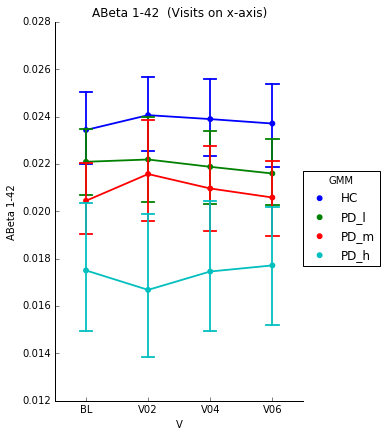

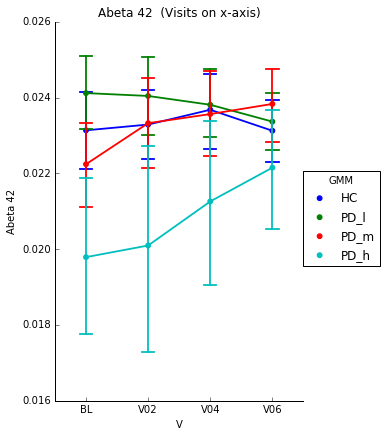

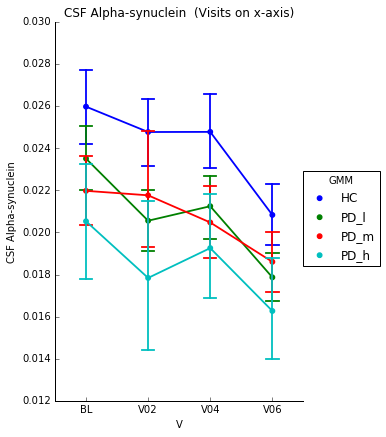

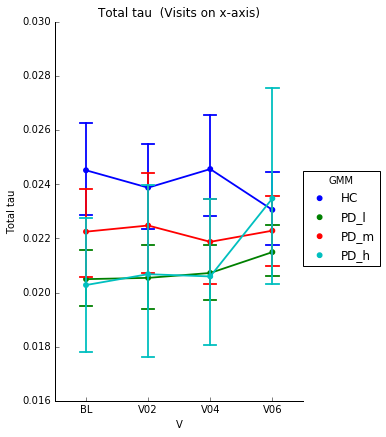

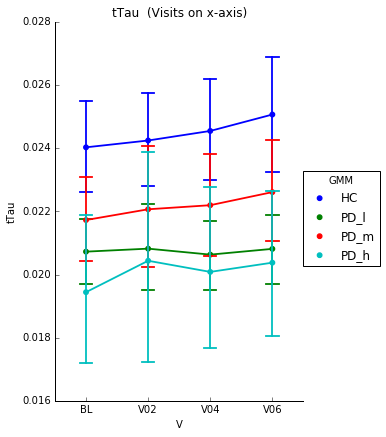

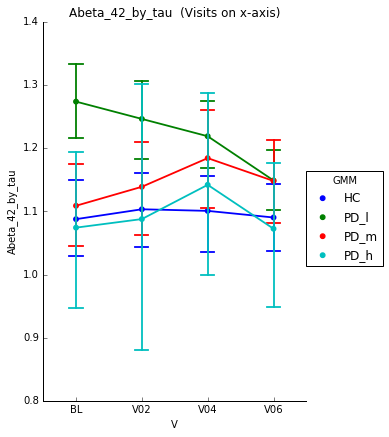

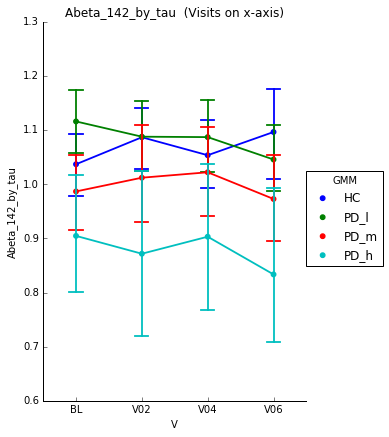

In [91]:
for i in range(len(plot_list)):
    a4_dims = (11.7, 8.27)
    g = sns.factorplot(x="V", y=plot_list[i], hue="GMM", data=a,\
                   hue_order =['HC', 'PD_l', 'PD_m', 'PD_h'],
                   capsize=0.2,  size=6, aspect=.75)
    plt.title(plot_list[i] + '  (Visits on x-axis)')


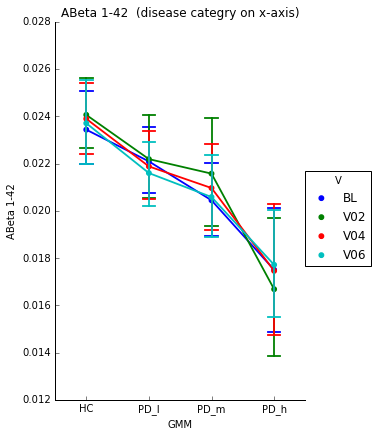

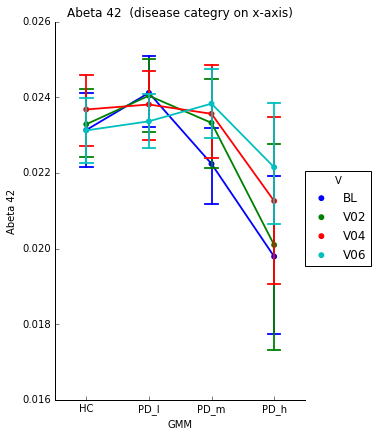

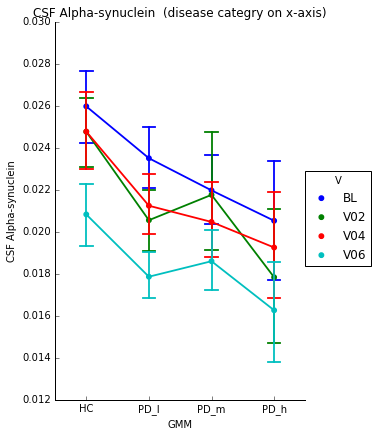

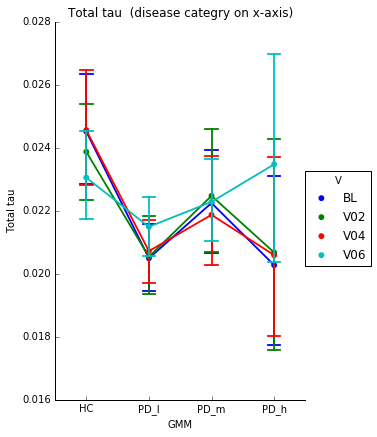

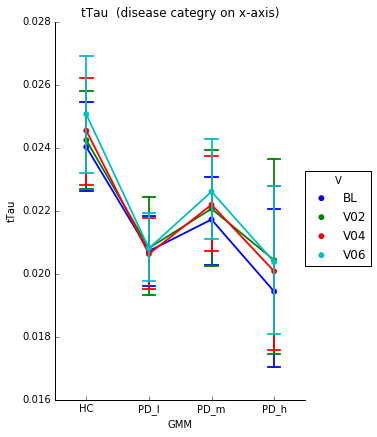

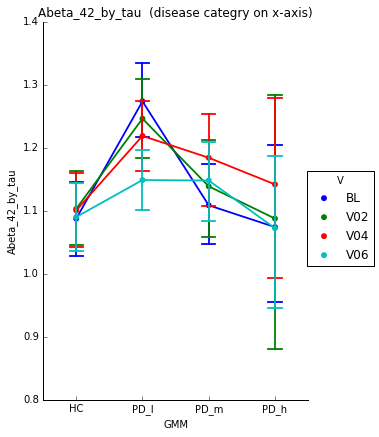

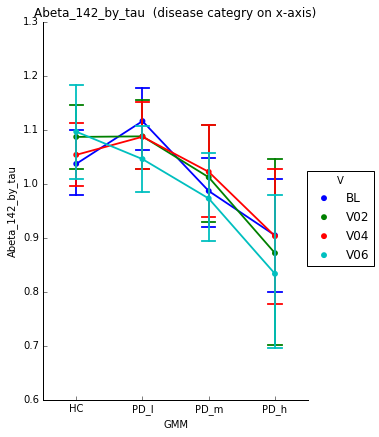

In [92]:
for i in range(len(plot_list)):
    a4_dims = (11.7, 8.27)
    g = sns.factorplot(x="GMM", y=plot_list[i], hue="V", data=a,\
                   hue_order =['BL', 'V02', 'V04', 'V06'],
                   capsize=0.2,  size=6, aspect=.75)
    plt.title(plot_list[i] + '  (disease categry on x-axis)')
    


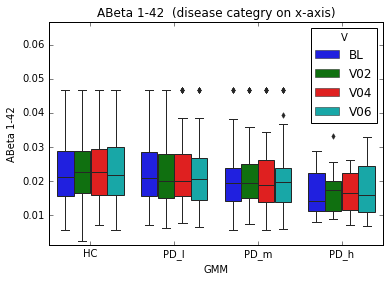

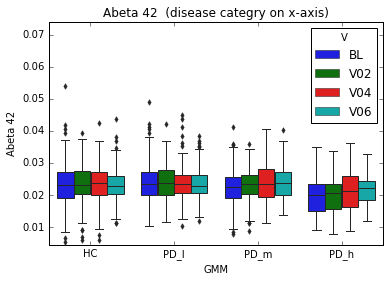

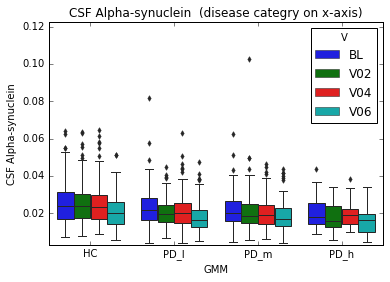

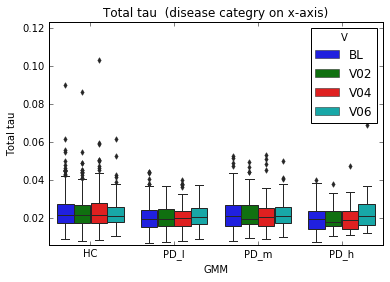

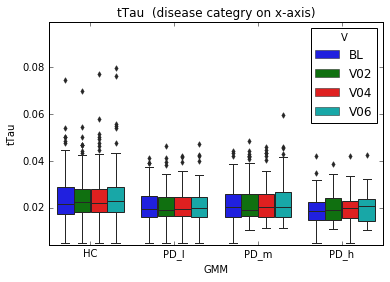

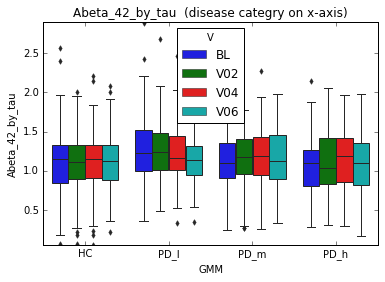

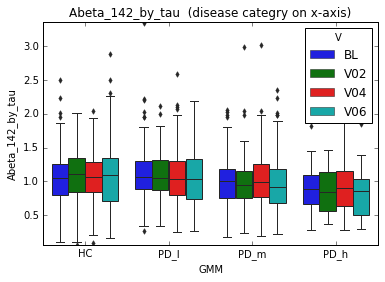

In [93]:

for i in range(len(plot_list)):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(sharey=True)
    ax.set(ylim=(min(a[plot_list[i]])-0.001, max(a[plot_list[i]])+0.02))
    cg = sns.boxplot(y=plot_list[i], hue="V", x="GMM", data=a, fliersize=4, ax=ax).set_title(plot_list[i] + '  (disease categry on x-axis)');




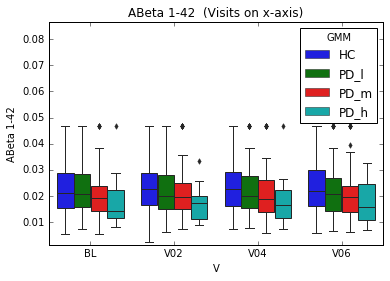

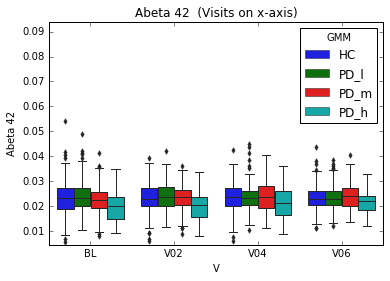

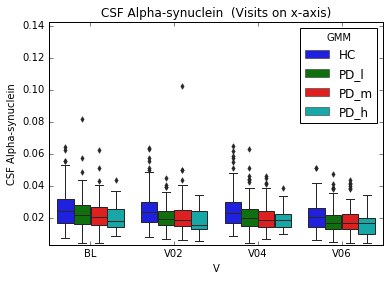

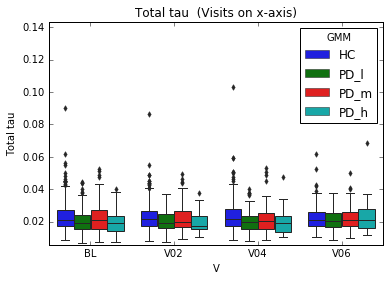

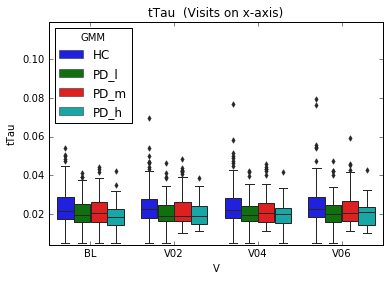

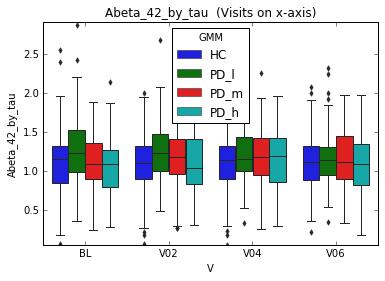

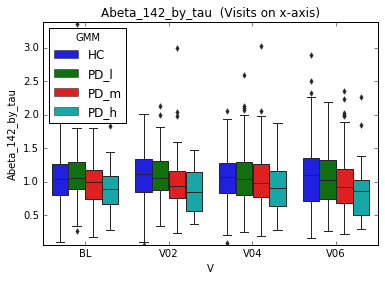

In [94]:
for i in range(len(plot_list)):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(sharey=True)
    ax.set(ylim=(min(a[plot_list[i]])-0.001, max(a[plot_list[i]])+0.04))
    cg = sns.boxplot(y=plot_list[i], hue="GMM", x="V", data=a, fliersize=4, ax=ax).set_title(plot_list[i]+ '  (Visits on x-axis)');



## imputation 2
### imputations were done for each visit seperately
### values which could not be imputed were removed
### dimensionof data after imputation (1294, 7)
#### #### values like >1700, <200, <80 was replaced by 2000, 100 and 40 resp.


In [95]:

serum1 = biospecimen[["EVENT_ID", "TESTNAME", "TESTVALUE"]]
a1 = pd.DataFrame(serum1.reset_index().set_index(['PATNO', "EVENT_ID", "TESTNAME"])\
                 .sort_index(level='PATNO'))
a = a1[~a1.index.duplicated()].unstack().reset_index().set_index(['PATNO'])


a.rename(columns={('EVENT_ID',''): 'EVENT_ID'}, inplace=True)
a = a[a.EVENT_ID.isin(['BL','V02','V04','V06'])]

aq = list(a.columns)
for i in range(len(aq)):
    aq[i] = aq[i][1]
    
aq[0] = 'V'
a.columns= aq

a1 = a.T
a1 = a1[a1.index.isin(['ABeta 1-42','Abeta 42','tTau', 'CSF Alpha-synuclein', 'Total tau','V','GMM'])]
#asde = list(a.columns)
a = a1.T
a = a.merge(M_label_PD_HC,left_index=True,right_index=True, how='outer')

filt = list(a.GMM.unique()) 
del filt[3]
a= a[a.GMM.isin(filt)]
a.shape


a.iloc[:,1] = a.iloc[:,1].replace(['>1700','<200'] , [2000, 100])
a.iloc[:,5] = a.iloc[:,5].replace(['<80',] , [40])

In [96]:
for i in range(a.shape[1]):
    try:
        a.iloc[:,i] = a.iloc[:,i].astype('float64', errors = 'ignore')
        #a.iloc[:,i] = pd.DataFrame(a.iloc[:,i]).interpolate(method='linear', axis=0, limit_direction = 'both')
        
    except:
        pass

#### Seperate imputation for each visit

In [97]:
visit_list = ['BL','V02','V04','V06']
for i in range(len(visit_list)):
    a[a.V == visit_list[i]] = pd.DataFrame(a[a.V == visit_list[i]] ).interpolate(method='linear', axis=0, limit_direction = 'both')

#### some values were not imputed , removing them.

In [98]:
a = a[~(a.isnull().sum(axis = 1) >= 2)]

In [99]:
a.isnull().sum()

V                      0
ABeta 1-42             0
Abeta 42               0
CSF Alpha-synuclein    0
Total tau              0
tTau                   0
GMM                    0
dtype: int64

In [100]:
a.shape

(1294, 7)

In [101]:
a.iloc[:,1:-1] = preprocessing.normalize(a.iloc[:,1:-1], axis = 0)
a['Abeta_42_by_tau'] = a["Abeta 42"]/a['Total tau']
a['Abeta_142_by_tau'] = a["ABeta 1-42"]/a['Total tau']


In [102]:
plot_list = ["ABeta 1-42", "Abeta 42", 'CSF Alpha-synuclein', 'Total tau', 'tTau', 'Abeta_42_by_tau', 'Abeta_142_by_tau']
%matplotlib inline

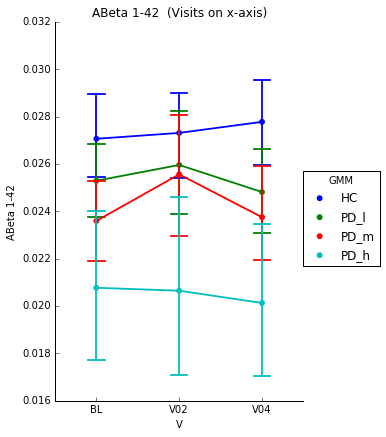

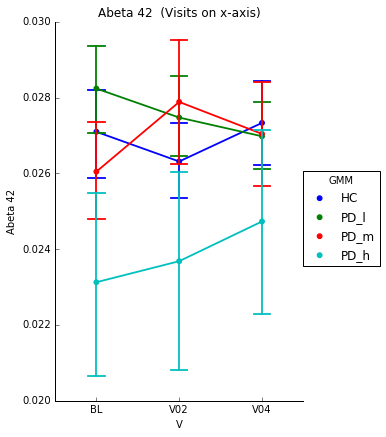

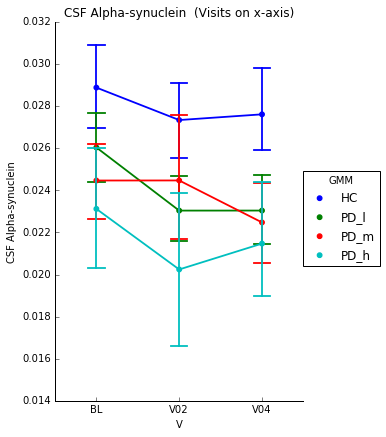

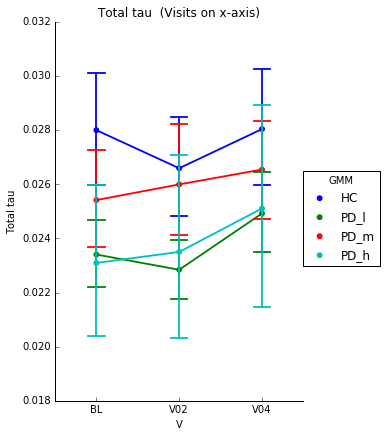

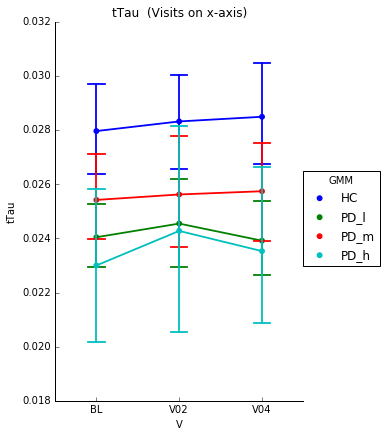

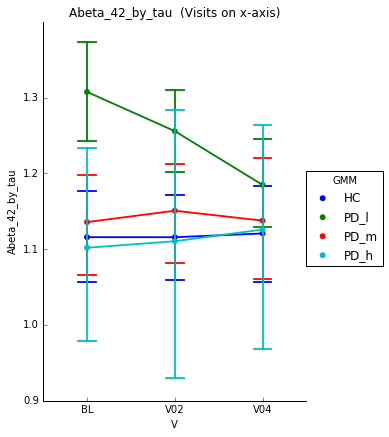

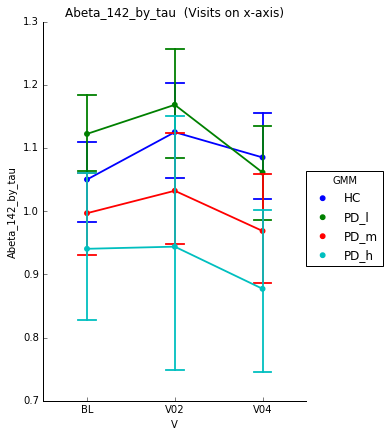

In [103]:
for i in range(len(plot_list)):
    a4_dims = (11.7, 8.27)
    g = sns.factorplot(x="V", y=plot_list[i], hue="GMM", data=a,\
                   hue_order =['HC', 'PD_l', 'PD_m', 'PD_h'],
                   capsize=0.2,  size=6, aspect=.75)
    plt.title(plot_list[i] + '  (Visits on x-axis)')

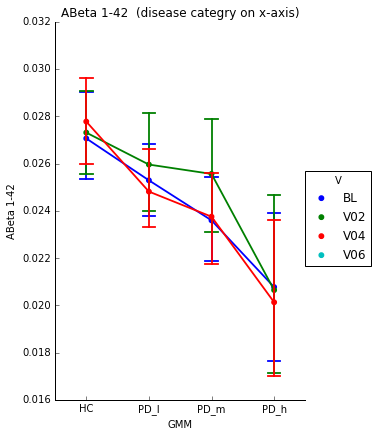

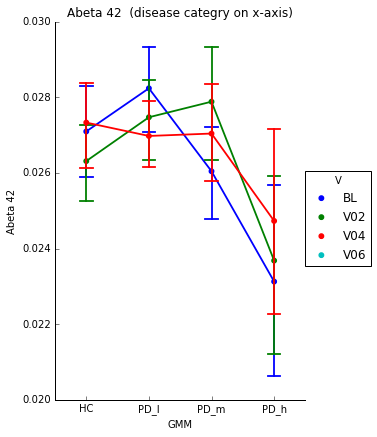

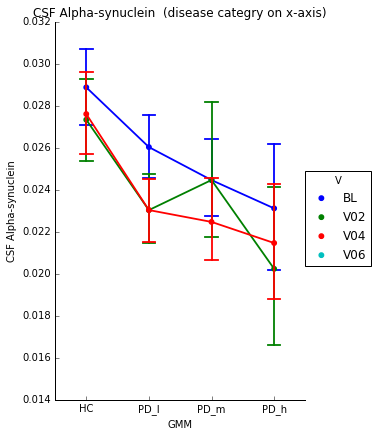

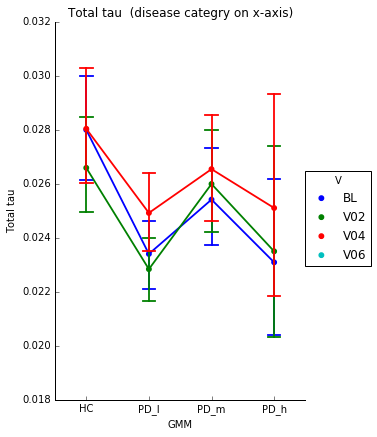

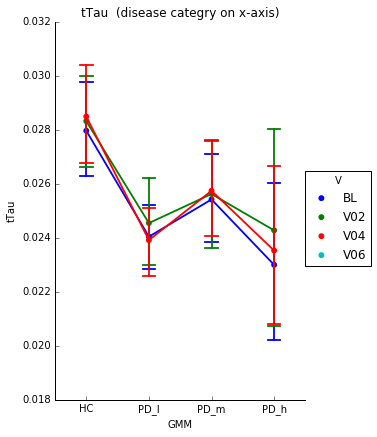

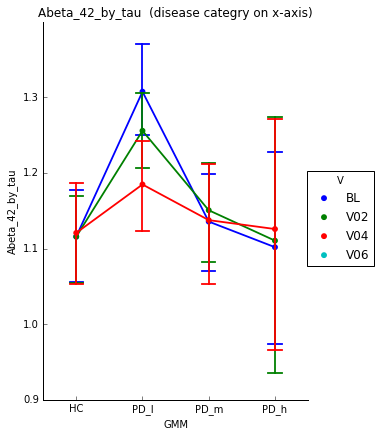

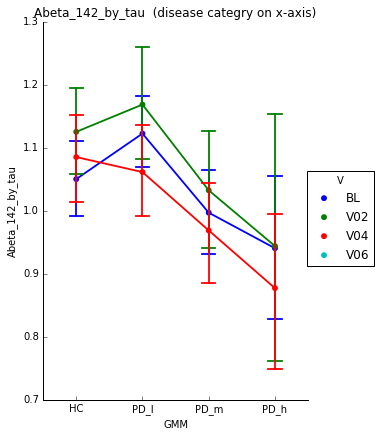

In [104]:
for i in range(len(plot_list)):
    a4_dims = (11.7, 8.27)
    g = sns.factorplot(x="GMM", y=plot_list[i], hue="V", data=a,\
                   hue_order =['BL', 'V02', 'V04', 'V06'],
                   capsize=0.2,  size=6, aspect=.75)
    plt.title(plot_list[i] + '  (disease categry on x-axis)')
    


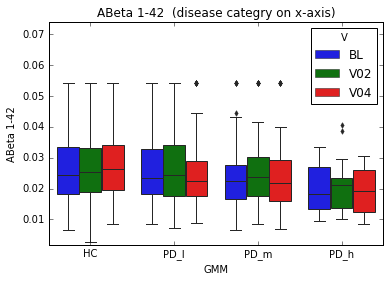

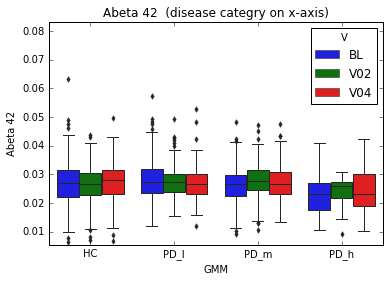

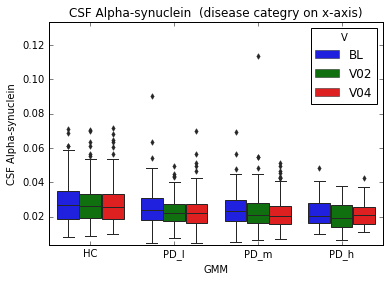

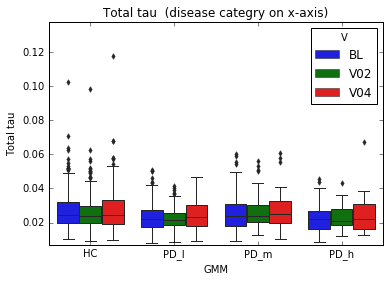

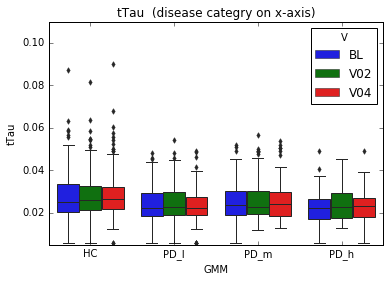

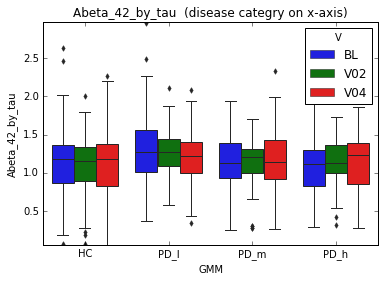

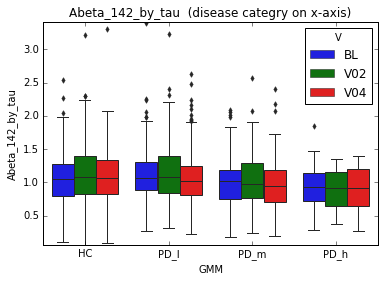

In [105]:

for i in range(len(plot_list)):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(sharey=True)
    ax.set(ylim=(min(a[plot_list[i]])-0.001, max(a[plot_list[i]])+0.02))
    cg = sns.boxplot(y=plot_list[i], hue="V", x="GMM", data=a, fliersize=4, ax=ax).set_title(plot_list[i] + '  (disease categry on x-axis)');



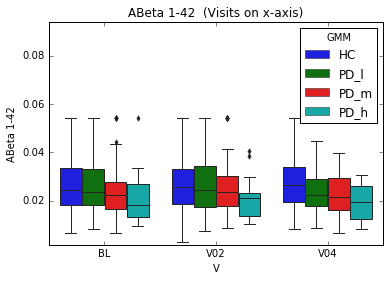

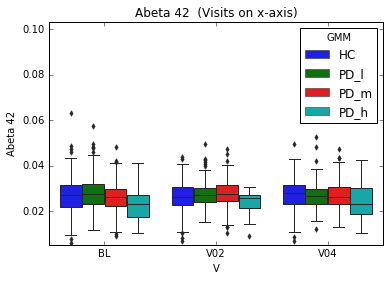

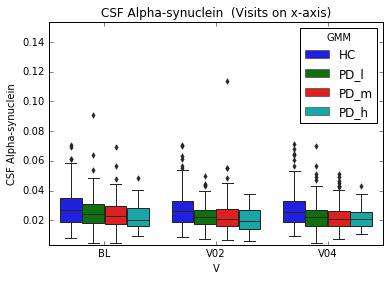

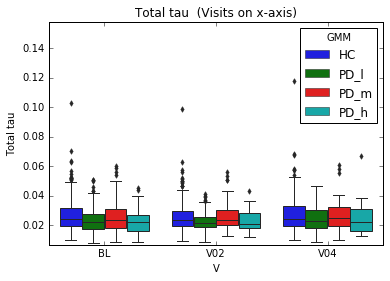

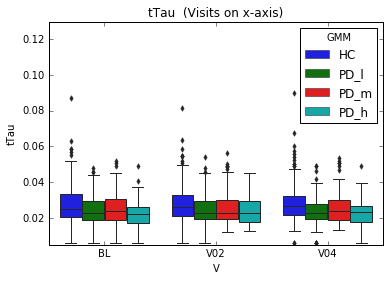

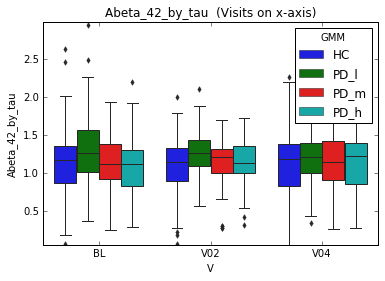

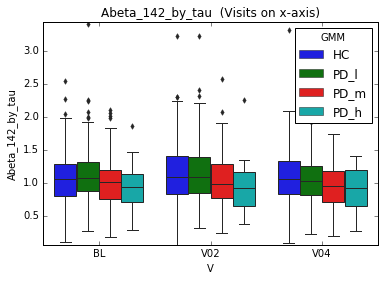

In [106]:
for i in range(len(plot_list)):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(sharey=True)
    ax.set(ylim=(min(a[plot_list[i]])-0.001, max(a[plot_list[i]])+0.04))
    cg = sns.boxplot(y=plot_list[i], hue="GMM", x="V", data=a, fliersize=4, ax=ax).set_title(plot_list[i]+ '  (Visits on x-axis)');



# imputation 3
### most spares rows were removed first (any row having more than  nan values) rows conatain PATNO and Columns contain Chemical name
### then imputaions were done visitwise
### dimension afetr imputTION (927, 7)
#### values like >1700, <200, <80 was replaced by 2000, 100 and 40 resp.

In [107]:
from sklearn import preprocessing
serum1 = biospecimen[["EVENT_ID", "TESTNAME", "TESTVALUE"]]
a1 = pd.DataFrame(serum1.reset_index().set_index(['PATNO', "EVENT_ID", "TESTNAME"])\
                 .sort_index(level='PATNO'))
a = a1[~a1.index.duplicated()].unstack().reset_index().set_index(['PATNO'])


a.rename(columns={('EVENT_ID',''): 'EVENT_ID'}, inplace=True)
a = a[a.EVENT_ID.isin(['BL','V02','V04','V06'])]

aq = list(a.columns)
for i in range(len(aq)):
    aq[i] = aq[i][1]
    
aq[0] = 'V'
a.columns= aq

a1 = a.T
a1 = a1[a1.index.isin(['ABeta 1-42','Abeta 42','tTau', 'CSF Alpha-synuclein', 'Total tau','V','GMM'])]
#asde = list(a.columns)
a = a1.T
a = a.merge(M_label_PD_HC,left_index=True,right_index=True, how='outer')

filt = list(a.GMM.unique()) 
del filt[3]
a= a[a.GMM.isin(filt)]
a.iloc[:,1] = a.iloc[:,1].replace(['>1700','<200'] , [2000, 100])
a.iloc[:,5] = a.iloc[:,5].replace(['<80',] , [40])
#a = a[~(a.iloc[:,1].isin(['>1700','<200'] ))]
#a = a[~(a.iloc[:,5].isin(['<80']))]

In [108]:
a.shape

(1734, 7)

In [109]:
# rows having more than 2 nan values
(a.isnull().sum(axis = 1) >= 2).sum()

807

In [110]:
# removing them 
a = a[~(a.isnull().sum(axis = 1) >= 2)]

In [111]:
a.shape

(927, 7)

In [112]:
a.isnull().sum()


V                       0
ABeta 1-42             15
Abeta 42                0
CSF Alpha-synuclein     0
Total tau               6
tTau                    0
GMM                     0
dtype: int64

In [113]:
for i in range(a.shape[1]):
    try:
        a.iloc[:,i] = a.iloc[:,i].astype('float64', errors = 'ignore')
        #a.iloc[:,i] = pd.DataFrame(a.iloc[:,i]).interpolate(method='linear', axis=0, limit_direction = 'both')
        
    except:
        pass

In [114]:
visit_list = ['BL','V02','V04','V06']
for i in range(len(visit_list)):
    a[a.V == visit_list[i]] = pd.DataFrame(a[a.V == visit_list[i]] ).interpolate(method='linear', axis=0, limit_direction = 'both')


In [115]:
a.isnull().sum()

V                      0
ABeta 1-42             0
Abeta 42               0
CSF Alpha-synuclein    0
Total tau              0
tTau                   0
GMM                    0
dtype: int64

In [116]:
a.shape

(927, 7)

In [117]:
a.iloc[:,1:-1] = preprocessing.normalize(a.iloc[:,1:-1], axis = 0)
a['Abeta_42_by_tau'] = a["Abeta 42"]/a['Total tau']
a['Abeta_142_by_tau'] = a["ABeta 1-42"]/a['Total tau']

In [118]:
plot_list = ["ABeta 1-42", "Abeta 42", 'CSF Alpha-synuclein', 'Total tau', 'tTau', 'Abeta_42_by_tau', 'Abeta_142_by_tau']
%matplotlib inline

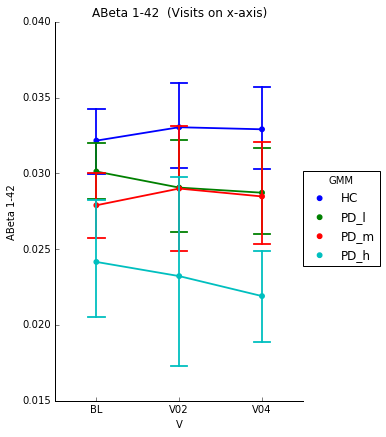

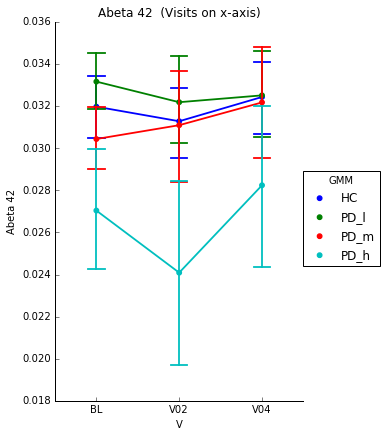

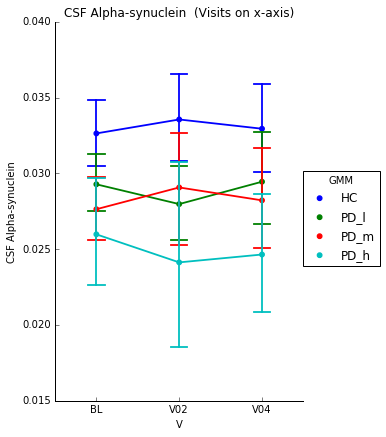

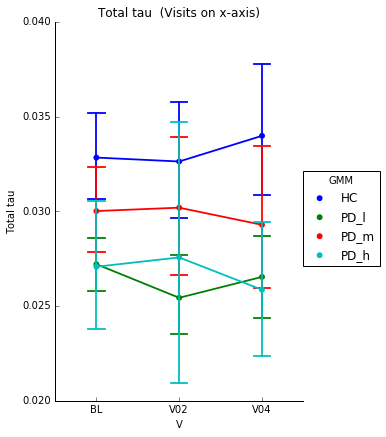

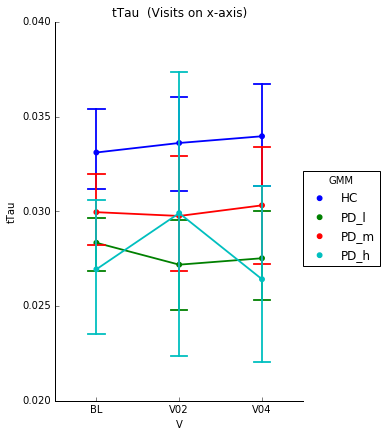

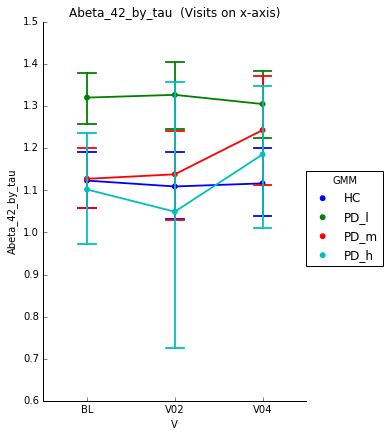

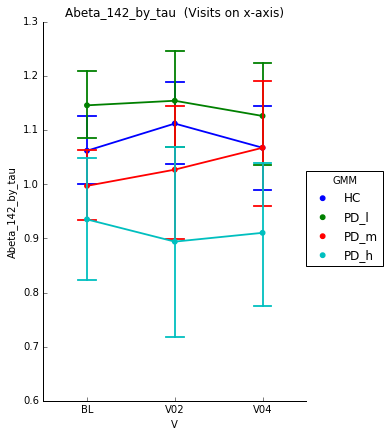

In [119]:
for i in range(len(plot_list)):
    a4_dims = (11.7, 8.27)
    g = sns.factorplot(x="V", y=plot_list[i], hue="GMM", data=a,\
                   hue_order =['HC', 'PD_l', 'PD_m', 'PD_h'],
                   capsize=0.2,  size=6, aspect=.75)
    plt.title(plot_list[i] + '  (Visits on x-axis)')

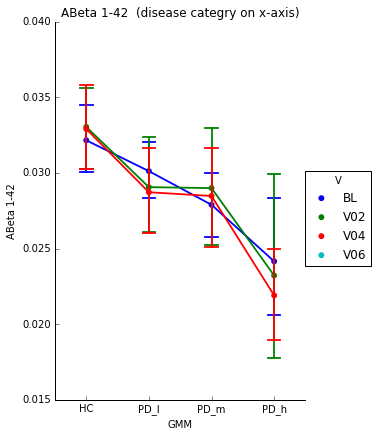

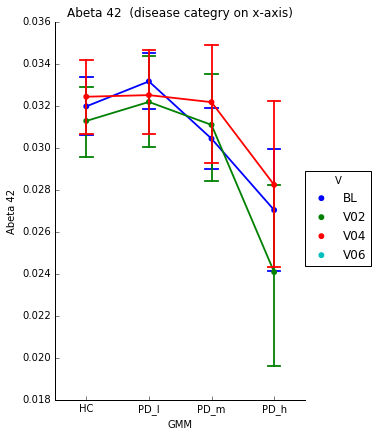

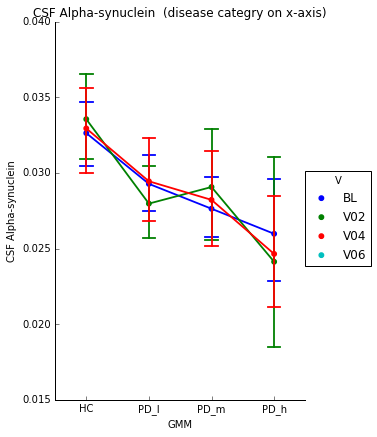

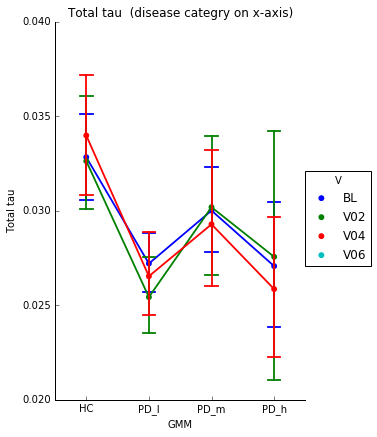

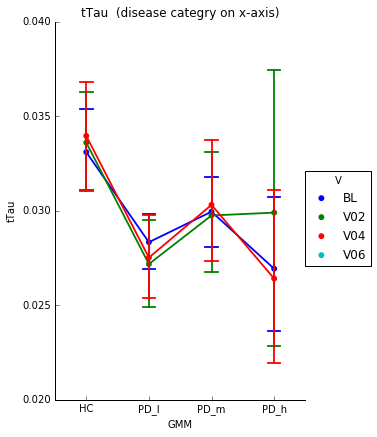

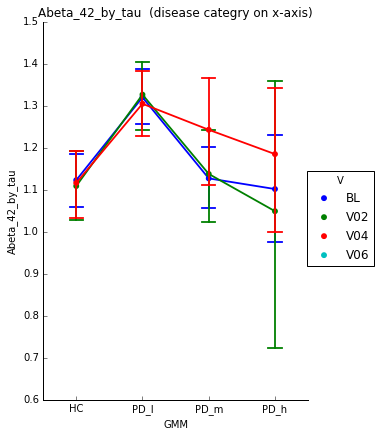

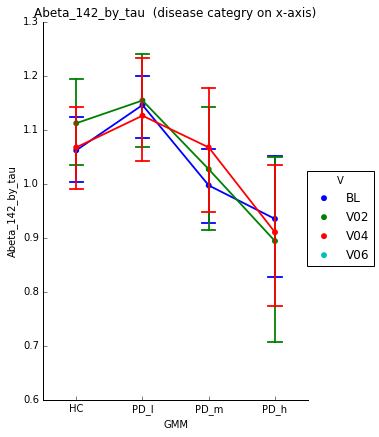

In [120]:
for i in range(len(plot_list)):
    a4_dims = (11.7, 8.27)
    g = sns.factorplot(x="GMM", y=plot_list[i], hue="V", data=a,\
                   hue_order =['BL', 'V02', 'V04', 'V06'],
                   capsize=0.2,  size=6, aspect=.75)
    plt.title(plot_list[i] + '  (disease categry on x-axis)')
    


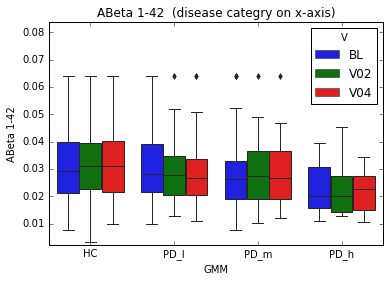

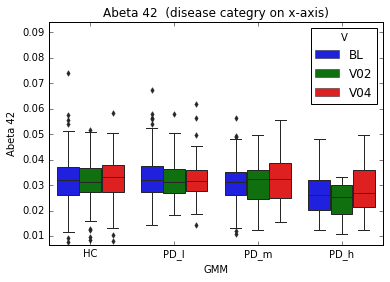

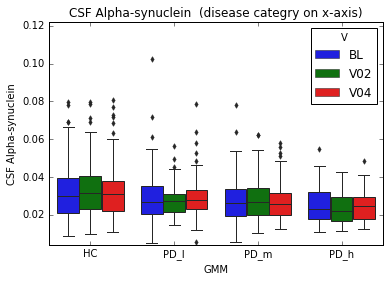

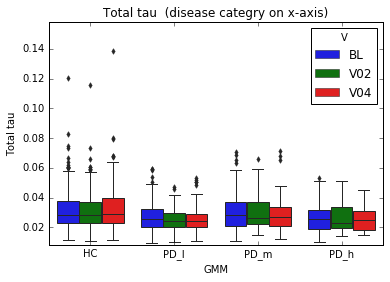

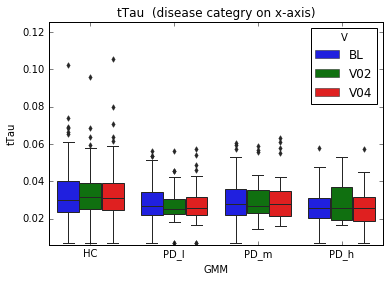

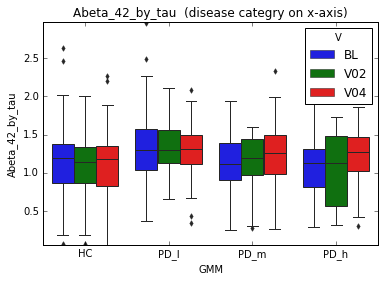

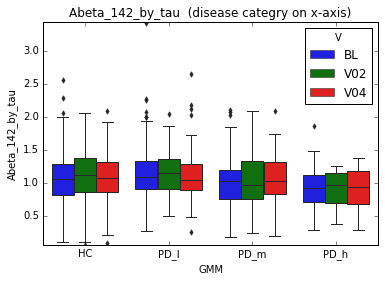

In [121]:

for i in range(len(plot_list)):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(sharey=True)
    ax.set(ylim=(min(a[plot_list[i]])-0.001, max(a[plot_list[i]])+0.02))
    cg = sns.boxplot(y=plot_list[i], hue="V", x="GMM", data=a, fliersize=4, ax=ax).set_title(plot_list[i] + '  (disease categry on x-axis)');



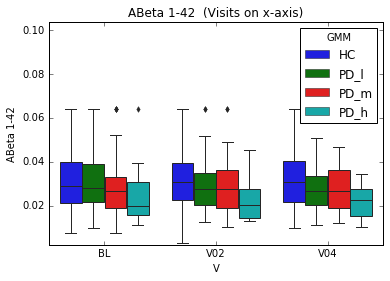

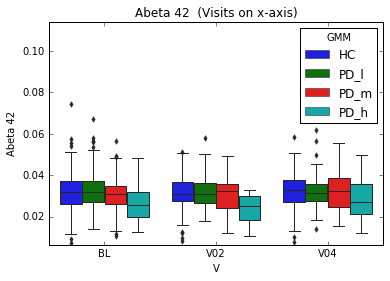

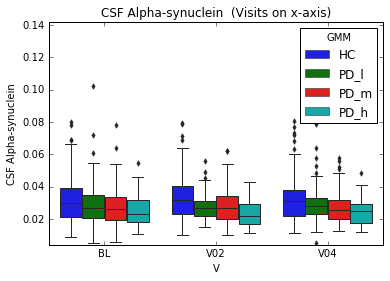

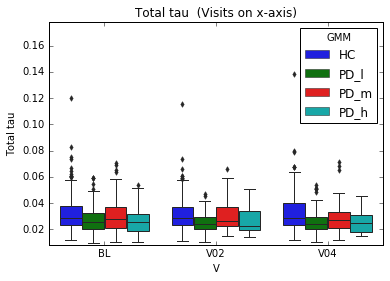

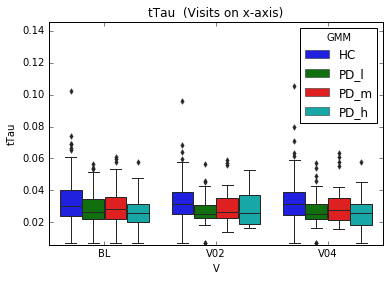

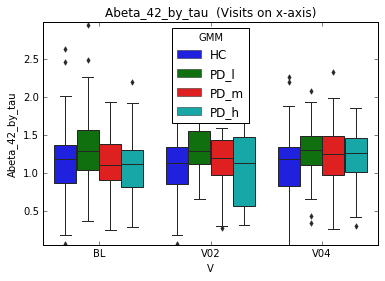

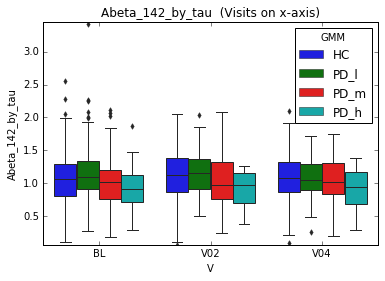

In [122]:
for i in range(len(plot_list)):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(sharey=True)
    ax.set(ylim=(min(a[plot_list[i]])-0.001, max(a[plot_list[i]])+0.04))
    cg = sns.boxplot(y=plot_list[i], hue="GMM", x="V", data=a, fliersize=4, ax=ax).set_title(plot_list[i]+ '  (Visits on x-axis)');



#### Since data is less I tried diffferent type of imputation 
#### The general trend is same in most of the graphs